In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [135]:
np.random.seed(54) #random runber generator
X = np.random.rand(100,1) #produce number with uniform distribution between 0 and 1
y = 3+ 5*X + np.random.randn(100,1) #produce number with normal distribution centered around 0 with std is 1

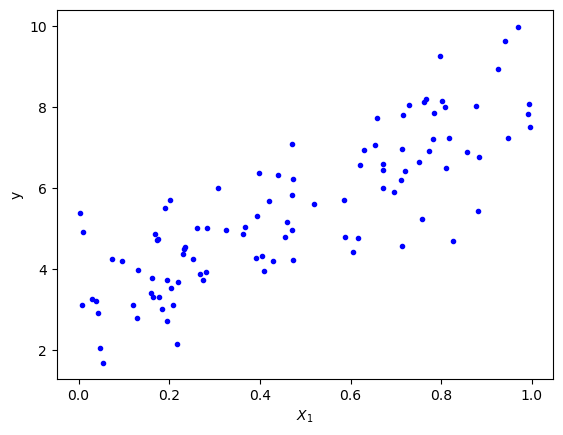

In [136]:
plt.plot(X, y, 'b.')
plt.xlabel('$X_1$')
plt.ylabel('y')
plt.show()

### Regression based on normal Equation

In [137]:
#np.ones used to generate the array of 1 with given size
#np.c_ concatenate the series or array
X_b = np.c_[np.ones((X.shape[0], 1)),X] 

In [30]:
#Normal queation used to find the best weight for a linear regression. It is used similar to the gradient descent
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [31]:
theta_best

array([[3.0178642 ],
       [5.14751332]])

In [138]:
X_new = np.array([[0], [1.5]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.0178642 ],
       [10.73913418]])

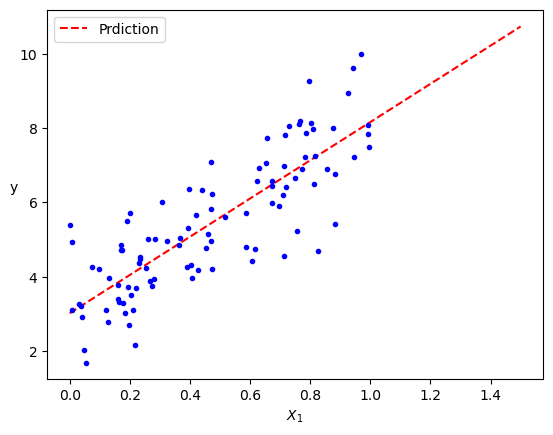

In [52]:
plt.plot(X_new, y_predict, 'r--', label = 'Prdiction')
plt.plot(X,y,'b.')
plt.xlabel('$X_1$')
plt.ylabel('y', rotation = 0)
plt.legend(loc = 'upper left')
plt.show()

### Finding best theta with scikit learn

In [12]:
from sklearn.linear_model import LinearRegression

In [54]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.0178642]), array([[5.14751332]]))

In [56]:
lin_reg.predict(X_new)

array([[ 3.0178642 ],
       [10.73913418]])

In [139]:
#Scikit learn linear model is based on the scipy linalg.lstsq() function (least square)
theta_best_svd, residual, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.0178642 ],
       [5.14751332]])

This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the _pseudoinverse_ of $\mathbf{X}$ (specifically the Moore-Penrose inverse). You can use `np.linalg.pinv()` to compute the pseudoinverse directly:

In [65]:
np.linalg.pinv(X_b).dot(y)

array([[3.0178642 ],
       [5.14751332]])

### Linear Regression with gradient descent

Batch Gradient descent

In [70]:
#using Batch gradient descent to find the best weight
learning_rate = 0.1
m = X_b.shape[0]
n_iteration = 1000
theta = np.random.randn(2,1)

for i in range(n_iteration):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta -= learning_rate * gradients
    if i % 100 == 0:
        print(theta)

[[1.83995158]
 [0.39906582]]
[[3.44128373]
 [4.30819212]]
[[3.12518408]
 [4.93477903]]
[[3.04506549]
 [5.0935937 ]]
[[3.02475864]
 [5.13384686]]
[[3.01961166]
 [5.14404942]]
[[3.01830711]
 [5.14663536]]
[[3.01797646]
 [5.14729079]]
[[3.01789265]
 [5.14745692]]
[[3.01787141]
 [5.14749903]]


In [71]:
X_new_b.dot(theta)

array([[ 3.01786605],
       [10.73913053]])

Impact of learning rate on prediction

In [100]:
theta_path_bgd = []

def plot_gradient_descent(Xtrain, ytrain, learning_rate, n_iteration, theta_path = None):
    plt.plot(X,y,'b.')
    m = Xtrain.shape[0]

    np.random.seed(54)
    theta = np.random.randn(Xtrain.shape[1],1)

    for i in range(n_iteration):
        if i < 10:
            y_predict = X_new_b.dot(theta)
            style = 'r--' if i==0 else 'b-'
            plt.plot(X_new, y_predict, style)
        if i == 999:
            plt.plot(X_new, y_predict, 'r-')
        gradients = 2/m * Xtrain.T.dot(Xtrain.dot(theta) - ytrain)
        theta -= learning_rate * gradients
        if theta_path is not None:
            theta_path_bgd.append(theta)
    #print(theta)
    plt.xlabel('$X_1$')
    plt.title('learning_rate = {}'.format(learning_rate))

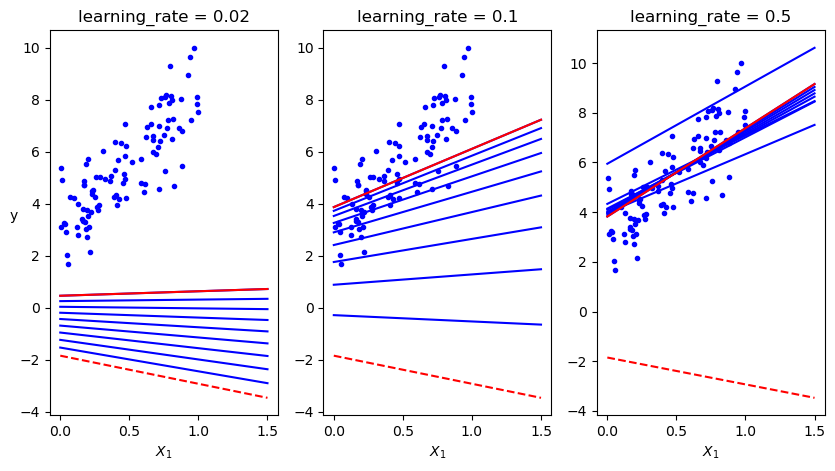

In [101]:
plt.figure(figsize=(10,5))
plt.subplot(131); plot_gradient_descent(X_b,y,learning_rate=0.02, n_iteration=1000)
plt.ylabel('y', rotation = 0)
plt.subplot(132); plot_gradient_descent(X_b,y,learning_rate=0.1, n_iteration=1000)
plt.subplot(133); plot_gradient_descent(X_b,y,learning_rate=0.5, n_iteration=1000, theta_path=theta_path_bgd)

Stocastic Gradient Descent

[[3.04887033]
 [5.03059196]]


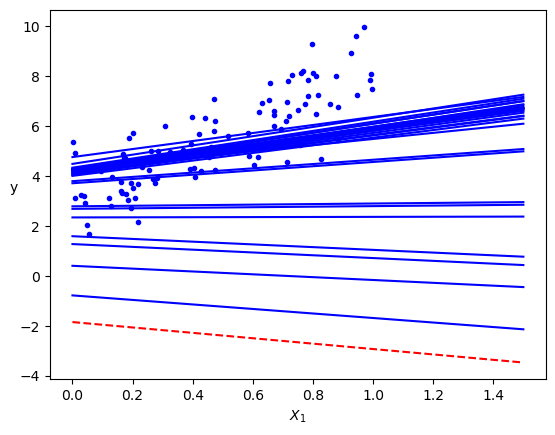

In [111]:
theta_path_sgd = []

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(54)
theta = np.random.randn(2, 1)
n_epoch = 50
m = len(X_b)
t0 = 5
t1 = 50

for epoch in range(n_epoch):
    for i in range(m):
        if epoch == 0 and i < 30:
            y_predict = X_new_b.dot(theta)
            style='r--' if i==0 else 'b-'
            plt.plot(X_new, y_predict, style)
        randome_index = np.random.randint(m)
        X_i = X_b[randome_index:randome_index+1]
        y_i = y[randome_index:randome_index+1]
        gradients = 2 * X_i.T.dot(X_i.dot(theta) - y_i)
        learning_rate = learning_schedule(epoch * m + i)
        theta -= learning_rate * gradients
        theta_path_sgd.append(theta)

print(theta)
plt.plot(X,y,'b.')
plt.xlabel('$X_1$')
plt.ylabel('y', rotation = 0)
plt.show()

Stocastic gradient descent with scikit learn

In [7]:
from sklearn.linear_model import SGDRegressor

In [ ]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=54)
sgd_reg.fit(X_b, y.ravel())

In [116]:
sgd_reg.intercept_, sgd_reg.coef_

(array([1.53762423]), array([1.53762423, 5.03014109]))

Mini batch gradient descent

In [123]:
theta_path_mgd = []
m = len(X_b)

n_iteration = 50
min_batch_size = 20
t0, t1 = 200, 1000
t = 0

np.random.seed(54)
theta = np.random.randn(2,1)

In [127]:
for epoch in range(n_iteration):
    shuffled_index = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_index]
    y_shuffled = y[shuffled_index]
    for i in range(0,100,min_batch_size):
        t+=1
        X_i = X_b_shuffled[i:i+min_batch_size]
        y_i = y_shuffled[i:i+min_batch_size]
        gradients = 2 / min_batch_size * X_i.T.dot(X_i.dot(theta) - y_i)
        learning_rate = learning_schedule(t)
        theta -= learning_rate * gradients
        theta_path_mgd.append(theta)

In [128]:
theta

array([[3.01945199],
       [5.15241469]])

### Polynomial Regression with Scikit learn

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [2]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

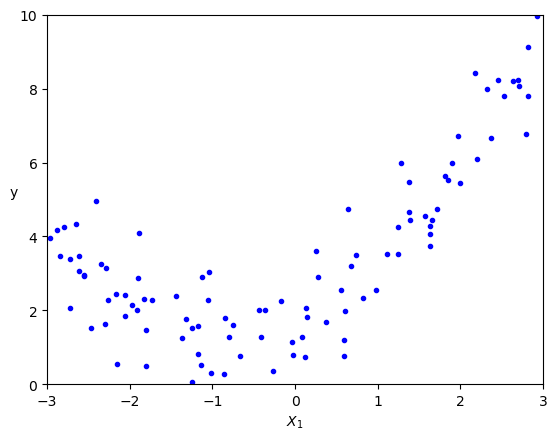

In [3]:
plt.plot(X, y, 'b.')
plt.xlabel('$X_1$')
plt.ylabel('y', rotation = 0)
plt.axis([-3,3,0,10])
plt.show()

In [8]:
poly_feature = PolynomialFeatures(degree=2, include_bias=False) #define the PolynomialFeatures as the straight line will not be able to fit this
X_poly = poly_feature.fit_transform(X) #fit the model with training data
X[0]

array([-0.75275929])

In [9]:
X_poly[0] #2 features has been added in the training data and 2nd feature has the polynomial degree

array([-0.75275929,  0.56664654])

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

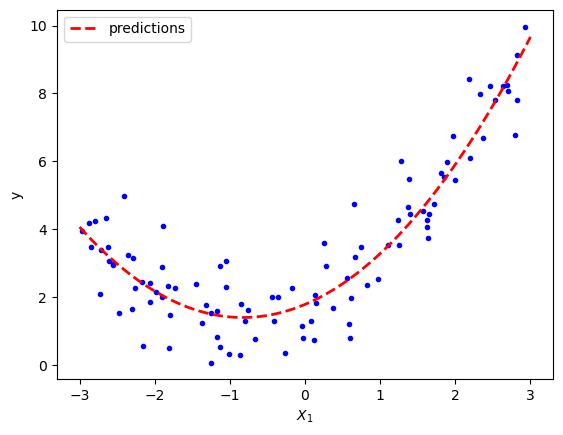

In [14]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_feature.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r--', linewidth = 2, label = 'predictions')
plt.xlabel('$X_1$')
plt.ylabel('y')
plt.legend(loc = 'upper left')
plt.show()

Difference between overfitting, undefitting with scikit learn

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


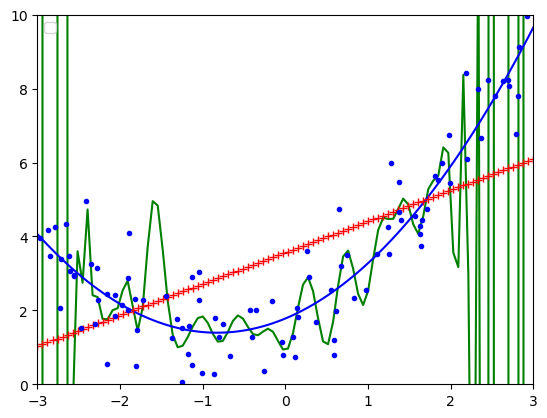

In [16]:
for style, degree in (('g-', 300), ('b-', 2), ('r+', 1)):
    polynomial_regression = PolynomialFeatures(degree=degree)
    Standard_scaler = StandardScaler()
    linear_regression = LinearRegression()
    polynomial_reg = Pipeline([
        ('poly_reg', polynomial_regression),
        ('std_scaler', Standard_scaler),
        ('lin_reg', linear_regression),
    ])
    polynomial_reg.fit(X,y)
    y_new = polynomial_reg.predict(X_new)
    plt.plot(X_new, y_new, style)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.show()

In [17]:
#Learning curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [47]:
def plot_learning_curve(model,X,y):
    train_error = []
    test_error = []
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=10)
    for i in range(1, len(X_train)+1):
        model.fit(X_train[:i], y_train[:i])
        prediction_train = model.predict(X_train[:i])
        prediction_test = model.predict(X_test)
        train_error.append(mean_squared_error(y_train[:i], prediction_train))
        test_error.append(mean_squared_error(y_test, prediction_test))
    plt.plot(np.sqrt(train_error),'b-', label = 'train')
    plt.plot(np.sqrt(test_error),'r-', label = 'test')
    plt.ylabel('sqrt(error)')
    plt.legend()

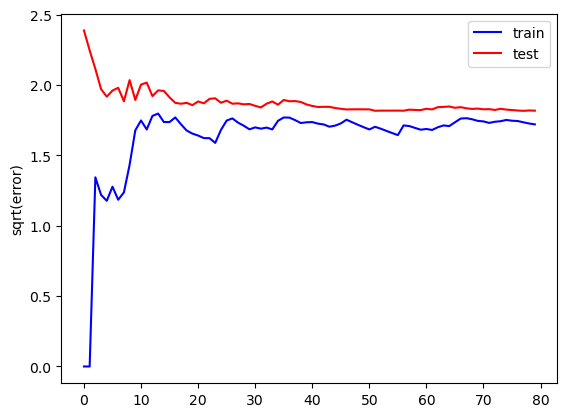

In [43]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg,X,y)

In [44]:
polynomial_regression = Pipeline([
    ('poly_reg', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])

(0.0, 80.0, 0.0, 3.0)

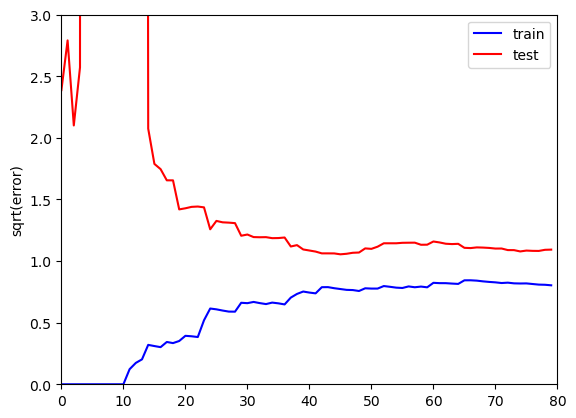

In [49]:
plot_learning_curve(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])